<a href="https://www.kaggle.com/code/bhanupratapbiswas/car-data-analysis-and-visualization?scriptVersionId=134979290" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

#for mathematical computation

import numpy as np
import pandas as pd
import scipy.stats as stats

#for data visualization

import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
from matplotlib.pyplot import figure


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indian-cars-data-analysis-and-visualization/cars_ds_final.csv


In [2]:
df = pd.read_csv('/kaggle/input/indian-cars-data-analysis-and-visualization/cars_ds_final.csv')
df

,Unnamed: 0,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Tata,Nano Genx,Emax Xm,"Rs. 2,96,661",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Tata,Nano Genx,Xta,"Rs. 3,34,768",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Tata,Nano Genx,Xm,"Rs. 2,72,223",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,1271,Honda,City,Vx Mt Diesel,"Rs. 13,02,000",1498 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,Yes,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1272,1272,Honda,City,Zx Mt Diesel,"Rs. 14,21,000",1498 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,Yes,Yes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1273,1273,Honda,City,Zx Cvt Petrol,"Rs. 14,31,000",1497 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,Yes,Yes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1274,1274,Honda,City,V Cvt Petrol,"Rs. 12,01,000",1497 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN


# Data exploration

In [3]:
df.describe()

,Unnamed: 0,Cylinders,Valves_Per_Cylinder,Doors,Seating_Capacity,Number_of_Airbags,USB_Ports
count,1276.000000,1210.000000,1174.000000,1272.000000,1270.000000,1141.000000,29.000000
mean,637.500000,4.380992,3.977853,4.550314,5.270079,3.787029,1.793103
std,368.493781,1.660957,0.833763,0.747816,1.145231,2.522399,0.773642
min,0.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000
25%,318.750000,4.000000,4.000000,4.000000,5.000000,2.000000,1.000000
50%,637.500000,4.000000,4.000000,5.000000,5.000000,2.000000,2.000000
75%,956.250000,4.000000,4.000000,5.000000,5.000000,6.000000,2.000000
max,1275.000000,16.000000,16.000000,5.000000,16.000000,14.000000,3.000000


In [4]:
df.info

<bound method DataFrame.info of       Unnamed: 0        Make      Model        Variant Ex-Showroom_Price  \
0              0        Tata  Nano Genx             Xt      Rs. 2,92,667   
1              1        Tata  Nano Genx             Xe      Rs. 2,36,447   
2              2        Tata  Nano Genx        Emax Xm      Rs. 2,96,661   
3              3        Tata  Nano Genx            Xta      Rs. 3,34,768   
4              4        Tata  Nano Genx             Xm      Rs. 2,72,223   
...          ...         ...        ...            ...               ...   
1271        1271       Honda       City   Vx Mt Diesel     Rs. 13,02,000   
1272        1272       Honda       City   Zx Mt Diesel     Rs. 14,21,000   
1273        1273       Honda       City  Zx Cvt Petrol     Rs. 14,31,000   
1274        1274       Honda       City   V Cvt Petrol     Rs. 12,01,000   
1275        1275  Mitsubishi    Montero         3.2 At     Rs. 68,62,560   

     Displacement  Cylinders  Valves_Per_Cylinder      

In [5]:
df[df.isnull()].count()

Unnamed: 0           0
Make                 0
Model                0
Variant              0
Ex-Showroom_Price    0
                    ..
USB_Ports            0
Heads-Up_Display     0
Welcome_Lights       0
Battery              0
Electric_Range       0
Length: 141, dtype: int64

In [6]:
df[df.duplicated()].count()

Unnamed: 0           0
Make                 0
Model                0
Variant              0
Ex-Showroom_Price    0
                    ..
USB_Ports            0
Heads-Up_Display     0
Welcome_Lights       0
Battery              0
Electric_Range       0
Length: 141, dtype: int64

In [7]:

df[df.isnull()].count()

Unnamed: 0           0
Make                 0
Model                0
Variant              0
Ex-Showroom_Price    0
                    ..
USB_Ports            0
Heads-Up_Display     0
Welcome_Lights       0
Battery              0
Electric_Range       0
Length: 141, dtype: int64

In [8]:
df=df.fillna('')
df=df.replace(' ', '')

# Data Visualization

In [9]:
df[df.Make =='Tata'].tail()

,Unnamed: 0,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
1141,1141,Tata,Harrier,Revotorq Dark Edition,"Rs. 17,30,755",1956 cc,3.0,4.0,FWD (Front Wheel Drive),In-line,...,,Yes,,Yes,,,,,,
1187,1187,Tata,Tiago Nrg,1.2L Revotron,"Rs. 5,94,993",1199 cc,3.0,4.0,FWD (Front Wheel Drive),In-line,...,,,,,,,,,,
1188,1188,Tata,Tiago Nrg,1.05L Revotorq,"Rs. 6,89,993",1047 cc,3.0,4.0,FWD (Front Wheel Drive),In-line,...,,,,,,,,,,
1189,1189,Tata,Tiago Nrg,1.2L Revotron Amt,"Rs. 6,39,993",1199 cc,3.0,4.0,FWD (Front Wheel Drive),In-line,...,,,,,,,,,,
1204,1204,Tata,Winger,15S,"Rs. 12,05,000",2200 cc,4.0,,FWD (Front Wheel Drive),V,...,,,,,,,,,,


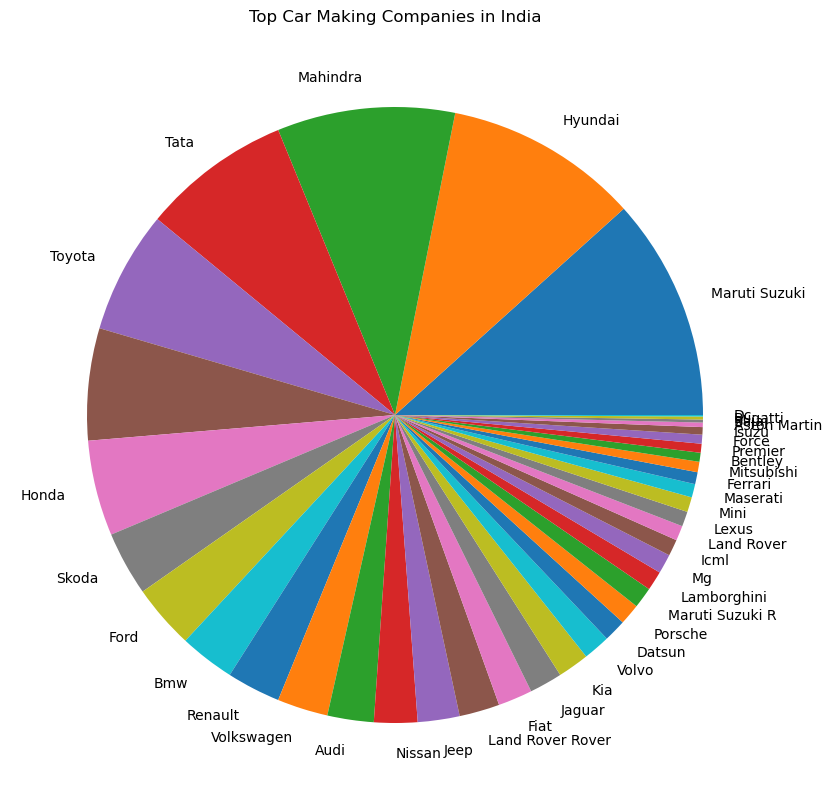

In [10]:

fig = plt.figure(figsize = (10,10))
ax = fig.subplots()
df.Make.value_counts().plot(ax=ax, kind='pie')
ax.set_ylabel("")
ax.set_title("Top Car Making Companies in India")
plt.show()
     

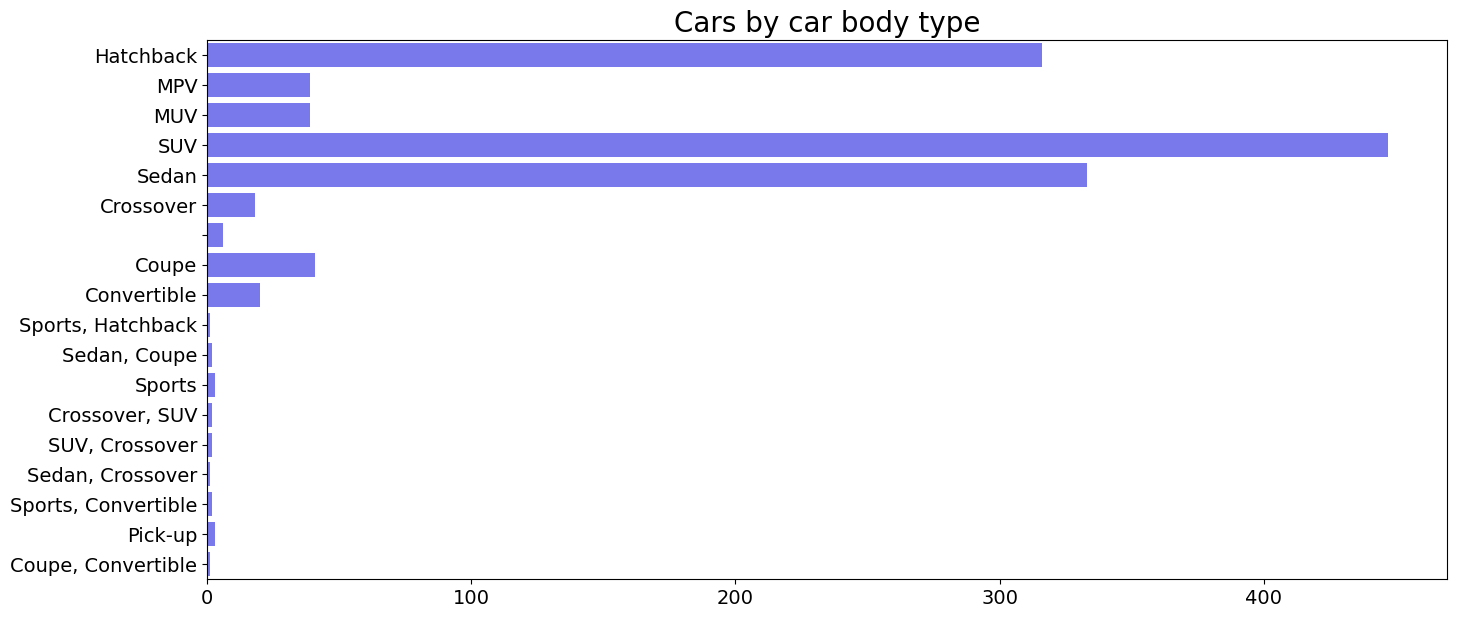

In [11]:

plt.figure(figsize=(16,7))
sns.countplot(data=df, y='Body_Type',alpha=.6,color='blue')
plt.title('Cars by car body type',fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('')
plt.ylabel('');

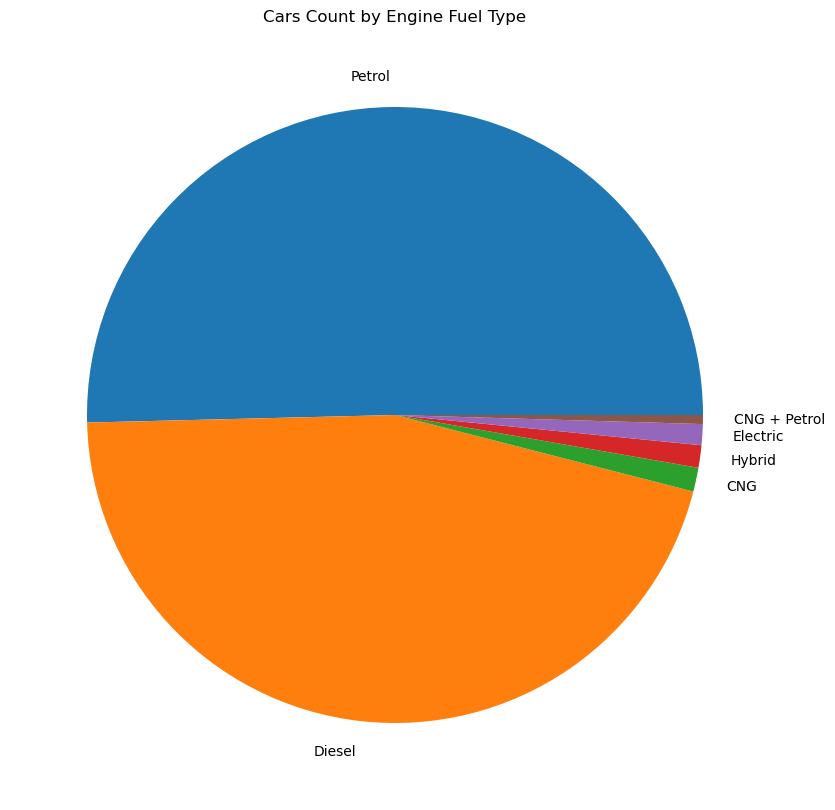

In [12]:
fig = plt.figure(figsize = (10,10))
ax = fig.subplots()
df.Fuel_Type.value_counts().plot(ax=ax, kind='pie')
ax.set_ylabel("")
ax.set_title("Cars Count by Engine Fuel Type")
plt.show()

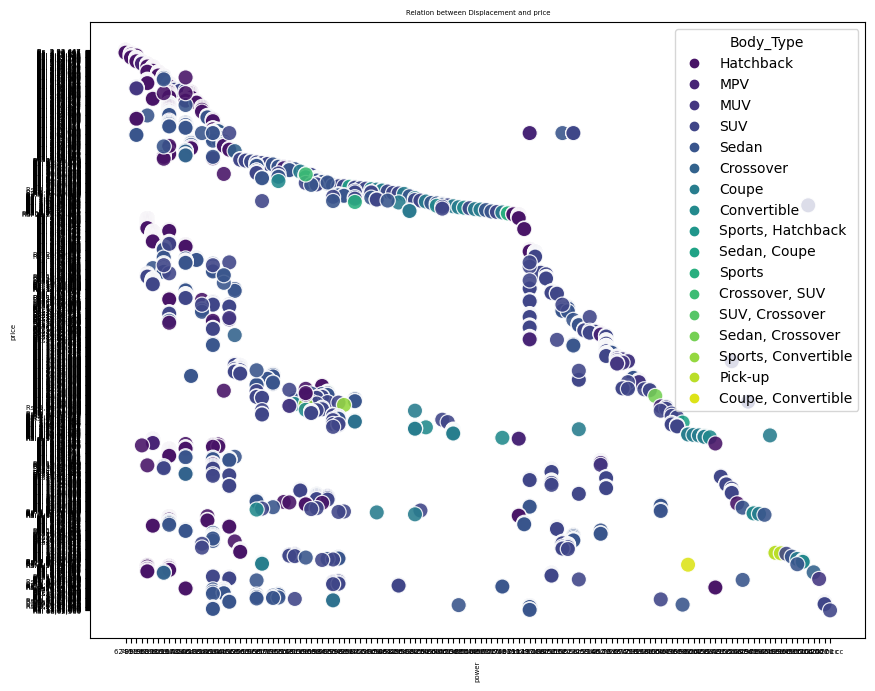

In [13]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='Displacement', y='Ex-Showroom_Price',hue='Body_Type',palette='viridis',alpha=.89, s=120 );
plt.xticks(fontsize=5);
plt.yticks(fontsize=5)
plt.xlabel('power',fontsize=5,rotation=90)
plt.ylabel('price',fontsize=5, rotation= 90)
plt.title('Relation between Displacement and price',fontsize=5);

In [14]:
fig = px.scatter_3d(df, x='Displacement', z='Ex-Showroom_Price', y='Fuel_Type',color='Make',width=800,height=750)
fig.update_layout(showlegend=True)
fig.show();
     

# Submission

In [15]:
df.to_csv('Clean_Car_data')